####The Sparks Foundation
####Name: Nimish Srivastava
####Task: To Predict the percentage of an student based on the no. of study hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


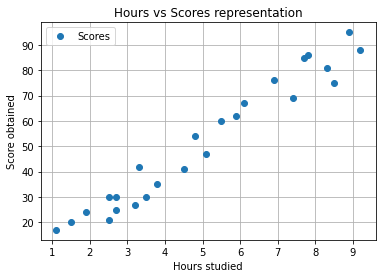

In [5]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores representation')
plt.ylabel('Score obtained')
plt.xlabel('Hours studied')
plt.grid()
plt.show()

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1:2].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state=0)

In [8]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [9]:
y_train

array([[35],
       [24],
       [86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30],
       [75],
       [21],
       [54],
       [95],
       [41]])

In [10]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [11]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

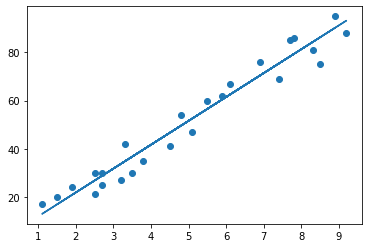

In [14]:
line = model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [15]:
predicted_y = model.predict(x_test)
predicted_y

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [16]:
new_df = pd.DataFrame({'Actual':y_test[:,0],'Predicted':predicted_y[:,0]})
new_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#predicted score if a student studies for 9.25 hrs/day
ans = model.predict([[9.25]])
ans[0][0]

93.69173248737539

In [18]:
#for calculating the errors
from sklearn import metrics
mean_abr = metrics.mean_absolute_error(y_test,predicted_y)
mean_sqr = metrics.mean_squared_error(y_test,predicted_y)
print("Mean absolute error : ",mean_abr)
print("Mean squared error : ",mean_sqr)

Mean absolute error :  4.183859899002982
Mean squared error :  21.598769307217456
